In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sn
from sklearn.metrics import confusion_matrix
import re
%matplotlib inline
from sklearn import model_selection, preprocessing, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df_inputdata=pd.read_csv('C:\\Users\\Admin\\Desktop\\Python\\SpamHam.csv',usecols = [0,1],encoding='latin-1' )

In [3]:
df_inputdata.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df_inputdata.rename(columns = {'v1': 'Category','v2': 'Message'}, inplace=True)

In [5]:
df_inputdata.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df_inputdata.count()

Category    5572
Message     5572
dtype: int64

In [7]:
df_inputdata.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [8]:
df_inputdata.groupby('Category').count()

,Message
Category,
ham,4825
spam,747


In [9]:
Category_count=pd.DataFrame()
Category_count['count'] = df_inputdata['Category'].value_counts()

In [10]:
Category_count['count']

ham     4825
spam     747
Name: count, dtype: int64

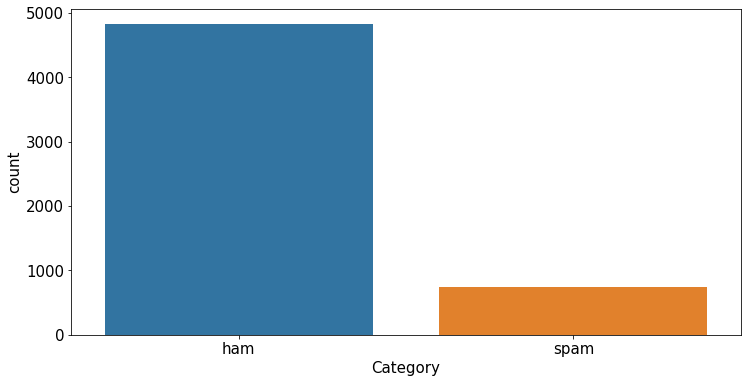

In [11]:
fig,ax=plt.subplots(figsize=(12,6))
sn.barplot(x=Category_count.index, y=Category_count['count'], ax = ax)
ax.set_ylabel('count',fontsize=15)
ax.set_xlabel('Category',fontsize=15)
ax.tick_params(labelsize=15)

In [12]:
#Looking at the above numbers of hams and spams, there are more number of hams than spams 

In [13]:
#Preprocessing Tweets for removing punctuations(! , '),@ ,# ,https,special characters
def ProcessMessage(tweet):
    from string import punctuation
    tweet = re.sub(r'\&\w*;','',tweet)
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub(r'\$\w*', '',tweet)
    tweet = tweet.lower()
    tweet = re.sub(r'https?:\/\/.*\/\w*', '',tweet)
    tweet = re.sub(r'#\w*', '',tweet)
    tweet = re.sub(r'[' + punctuation.replace('@', '')+ ']+', ' ',tweet)
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    tweet = re.sub(r'\s\s+', ' ',tweet)
    tweet = tweet.lstrip(' ')
    tweet = ''.join(c for c in tweet if c <= '\uFFFF')
    return tweet

In [14]:
df_inputdata['Message'] = df_inputdata['Message'].apply(ProcessMessage)

In [15]:
df_inputdata['Message'].head(9)

0    until jurong point crazy available only bugis ...
1                                  lar joking wif oni 
2    free entry wkly comp win cup final tkts 21st m...
3                  dun say early hor already then say 
4      nah don think goes usf lives around here though
5    freemsg hey there darling been week now and wo...
6    even brother not like speak with they treat li...
7    per your request melle melle oru minnaminungin...
8    winner valued network customer you have been s...
Name: Message, dtype: object

In [16]:
df_inputdata['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [17]:
#convert the labels from text to numbers
label_encoder = preprocessing.LabelEncoder()
df_inputdata['Category']= label_encoder.fit_transform(df_inputdata['Category'])

In [18]:
df_inputdata['Category'].head(9)

0    0
1    0
2    1
3    0
4    0
5    1
6    0
7    0
8    1
Name: Category, dtype: int32

In [19]:
X = df_inputdata.Message
y = df_inputdata.Category

In [20]:
#Split the dataset into 80% and 20% for training and testing respectively
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [21]:
type(X_train)

pandas.core.series.Series

In [22]:
#Convert the raw document into a matrix of TF-IDF features
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=20000)
#Create TF-IDF with X_train
tfidf_vect.fit(X_train)

TfidfVectorizer(max_features=20000, token_pattern='\\w{1,}')

In [23]:
#Use TF-IDF created with X_train for transforming X_train and X_test
xtrain_tfidf = tfidf_vect.transform(X_train)
xvalid_tfidf = tfidf_vect.transform(X_test)

In [24]:
#Create a model for NaiveBayes Model
model=naive_bayes.MultinomialNB()

In [25]:
#Train the model with X_train and y_train
model.fit(xtrain_tfidf,y_train)

MultinomialNB()

In [26]:
#Get the prediction for X_test which is transformed with TF_IDF
y_pred=model.predict(xvalid_tfidf)

In [27]:
#Get accuracy for the model
metrics.accuracy_score(y_test,y_pred)

0.9506726457399103

<AxesSubplot:>

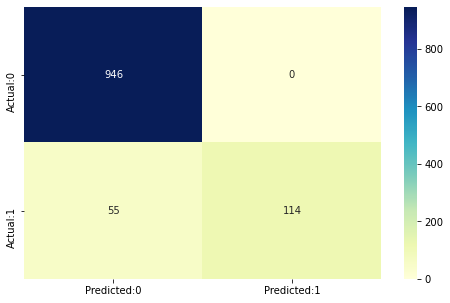

In [28]:
#Get the  Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [29]:
#Ham
#myHamData=np.array(["I HAVE A DATE ON SUNDAY WITH WILL!!"])
#spam
mySpamData=np.array(["Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030"])

In [30]:
mySpamData=tfidf_vect.transform(mySpamData)

In [31]:
y_res=model.predict(mySpamData)

In [32]:
y_res[0]

1

In [33]:
vals=label_encoder.inverse_transform([y_res[0]])

In [34]:
vals[0]

'spam'

In [58]:
#Ham, Spam
myMultiplesData=['Even my brother is not like to speak with me. They treat me like aids patent','WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.']

In [59]:
df_myMultiplesData=pd.DataFrame(myMultiplesData,columns={'Message'})

In [60]:
df_myMultiplesData['Message']=df_myMultiplesData['Message'].apply(ProcessMessage)

In [61]:
myMultiData=tfidf_vect.transform(df_myMultiplesData['Message'])

In [62]:
y_predLabels=model.predict(myMultiData)

In [63]:
y_predLabels.shape

(2,)

In [64]:
#y_predLabels=y_predLabels.reshape(-1)

In [65]:
vals=label_encoder.inverse_transform(y_predLabels)

In [66]:
for val in vals:
    print(val)

ham
spam


In [67]:
from sklearn.metrics import classification_report

In [68]:
report=classification_report(y_test, y_pred, labels=[0,1])

In [69]:
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       946
           1       1.00      0.67      0.81       169

    accuracy                           0.95      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.95      0.95      0.95      1115



In [70]:
type(report)

str

In [71]:
#recall= TP/(TP+FN)
#precision=TP/(TP+FP)
#f1-score=2*(precision*recall)/(precision+recall)

In [72]:
TP=cm[0,0]
FN=cm[0,1]
FP=cm[1,0]
TN=cm[1,1]

In [73]:
recall=TP/(TP+FN)

In [74]:
recall

1.0

In [75]:
precision=TP/(TP+FP)

In [76]:
precision

0.945054945054945

In [77]:
f1score=2*(precision*recall)/(precision+recall)

In [78]:
f1score

0.9717514124293786

In [79]:
#Good F1 Score means low falls positives and negatives

#Precision - precision is the ratio of correctly predicted positive
#observations to the total predicted positive observations.

#Reacall (Sensitivity) - Recall is the ratio of correctly predicted
#positive observations to the all observations in actual class

#F1 score - F1 Score is the weighted average of precision and recall